In [3]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Functions

In [4]:
abs(-2)

2

In [5]:
max(1,2,3)

3

In [6]:
100 * (9/5) + 32

212.0

In [7]:
0 * (9/5) + 32

32.0

In [8]:
21 * (9/5) + 32

69.80000000000001

In [9]:
# what was I doing?
# converting from celsius to fahrenheit
# when you find yourself repeating the same code over and over
# better to do a function

In [10]:
def fahrenheit(x):
    return x * (9/5) + 32

In [11]:
fahrenheit(100)

212.0

In [12]:
fahrenheit(0)

32.0

In [13]:
y = 100
fahrenheit(y/4)

77.0

In [14]:
# what happens when I run this?
x
# arguments are only available inside of the function

NameError: name 'x' is not defined

In [15]:
x = 25
fahrenheit(x) # what if i add x = 10 in the fahrenheit function?

77.0

In [ ]:
# back to slides

In [16]:
counts = make_array(1,2,3)
total = counts.sum()
np.round(counts / total * 100, 2)

array([16.67, 33.33, 50.  ])

In [17]:
def percents(counts):
    """ Converts counts to percents out of the total """
    total = counts.sum()
    np.round(counts / total * 100, 2)

In [18]:
percents(counts)
# what happened?

In [19]:
def percents(counts):
    """ Converts counts to percents out of the total """
    total = counts.sum()
    return np.round(counts / total * 100, 2)

In [20]:
percents(counts)

array([16.67, 33.33, 50.  ])

In [21]:
# if i want to change the number of decimal places .... (change to 1, to 3)
# good indicatr to add another argument
def percents(counts,decimal_places):
    """ Converts counts to percents out of the total """
    total = counts.sum()
    return np.round(counts / total * 100, decimal_places)

In [22]:
percents(counts,1)

array([16.7, 33.3, 50. ])

In [23]:
# what if i almost always want to round to 2?
percents(counts)

TypeError: percents() missing 1 required positional argument: 'decimal_places'

In [24]:
def percents(counts,decimal_places=2):
    """ Converts counts to percents out of the total """
    total = counts.sum()
    return np.round(counts / total * 100, decimal_places)

In [26]:
percents(counts)

array([16.67, 33.33, 50.  ])

In [27]:
percents(counts,5)

array([16.66667, 33.33333, 50.     ])

In [ ]:
# we've actually seen this before
table.sort()
table.sort(descending=True)

In [29]:
# back to slides

# Apply

In [30]:
def cut_off_at_a_billion(x):
    '''The smaller fo x and 1,000,000,000'''
    return min(x,1e9)

In [32]:
cut_off_at_a_billion(1e9+150)

1000000000.0

In [40]:
top = Table.read_table('top_movies_2017.csv')
top = top.where('Studio','Fox').sort(3,descending=True)
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
The Empire Strikes Back,Fox,290475067,872825900,1980
Avatar,Fox,760507625,865082100,2009
Return of the Jedi,Fox,309306177,836188200,1983
Star Wars: Episode I - The Phantom Menace,Fox,474544677,802874300,1999
Butch Cassidy and the Sundance Kid,Fox,102308889,627259300,1969
Independence Day,Fox,306169268,615800300,1996
Home Alone,Fox,285761243,602157000,1990
Cleopatra (1963),Fox,57777778,597261000,1963


In [41]:
cut_off_at_a_billion(top.column(3).item(0))

1000000000.0

In [42]:
cut_off_at_a_billion(top.column(3))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [44]:
cut_off = top.apply(cut_off_at_a_billion, 'Gross (Adjusted)')
cut_off

array([1.000000e+09, 1.000000e+09, 8.728259e+08, 8.650821e+08,
       8.361882e+08, 8.028743e+08, 6.272593e+08, 6.158003e+08,
       6.021570e+08, 5.972610e+08, 5.818909e+08, 5.456296e+08,
       5.273955e+08, 4.895672e+08, 4.880784e+08, 4.772526e+08,
       4.753347e+08, 4.683642e+08, 4.058042e+08, 3.759846e+08,
       3.724394e+08, 3.720429e+08, 3.541648e+08, 3.413578e+08])

In [45]:
top.with_column('Cut Off',cut_off)

Title,Studio,Gross,Gross (Adjusted),Year,Cut Off
Star Wars,Fox,460998007,1583483200,1977,1e+09
The Sound of Music,Fox,158671368,1266072700,1965,1e+09
The Empire Strikes Back,Fox,290475067,872825900,1980,8.72826e+08
Avatar,Fox,760507625,865082100,2009,8.65082e+08
Return of the Jedi,Fox,309306177,836188200,1983,8.36188e+08
Star Wars: Episode I - The Phantom Menace,Fox,474544677,802874300,1999,8.02874e+08
Butch Cassidy and the Sundance Kid,Fox,102308889,627259300,1969,6.27259e+08
Independence Day,Fox,306169268,615800300,1996,6.158e+08
Home Alone,Fox,285761243,602157000,1990,6.02157e+08
Cleopatra (1963),Fox,57777778,597261000,1963,5.97261e+08


In [46]:
cut_off_at_a_billion

<function __main__.cut_off_at_a_billion(x)>

In [47]:
type(cut_off_at_a_billion)

function

In [48]:
cut_off_at_a_billion?

# Predictions

In [50]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


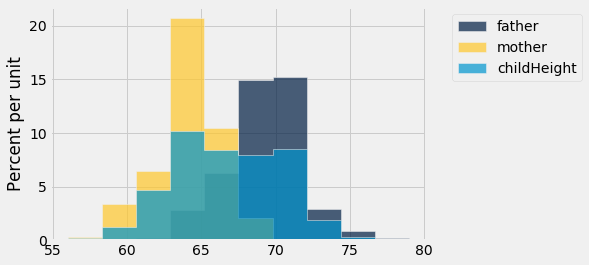

In [51]:
# Given that a father is 78.5" tall, and mother is 67" tall
# how tall will the children be?
galton.select(1,2,7).hist()

In [ ]:
# why are the father and mother bars taller?
# adults --> more dense; children --> more spread out
# genders are mixed together

In [54]:
# galton said: 'i think avg of parents height --> child height'
heights = galton.select(3,7).relabeled(0,'MidParent').relabeled(1,'Child')

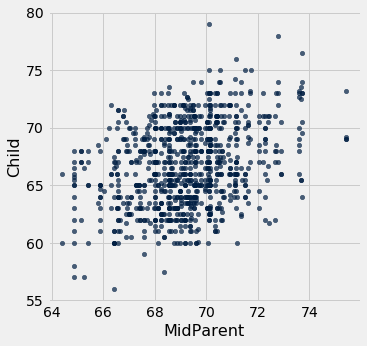

In [55]:
heights.scatter(0)

In [56]:
# what will my child height be if midparent height is 68?
# something a bit simpler than regression

close_to_68 = heights.where('MidParent',are.between(67.5,68.5))
close_to_68

MidParent,Child
68.44,62
67.94,71.2
67.94,67
68.33,62.5
68.23,73
68.23,72
68.23,69
67.98,73
67.98,71
67.98,71


In [57]:
close_to_68.column(1).mean()

66.24045801526718

In [59]:
def predict_child(mp):
    close_points = heights.where('MidParent', are.between(mp-0.5, mp+0.5))
    return close_points.column('Child').mean()

In [60]:
predict_child(70)

67.27285067873302

In [62]:
preds = heights.apply(predict_child,'MidParent')

In [64]:
heights_with_predictions = heights.with_columns(
    'Prediction',preds
)

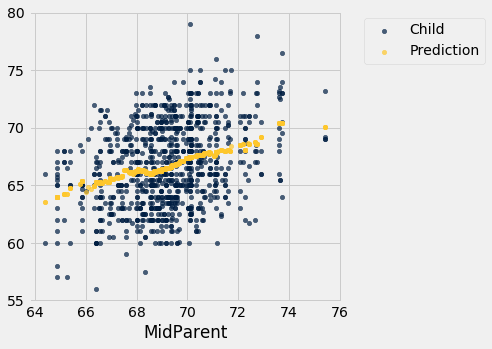

In [66]:
heights_with_predictions.scatter('MidParent')